# (not_done) Bootstraping
> 응용통계학 3주차

- toc:true
- branch: master
- badges: true
- comments: false
- author: 최서연
- categories: [Bootstraping]

## 1. Motivation

## 2. Applications

### 2.1 Estimation of variance

표본평균의 분산에 대한 추정량 = 붓스트랩 추정량 Bootstrap estimator

$$\hat{var}(\bar{X})^{*} = \frac{1}{B} \sum^{B}_{b=1} \big( \bar{X}^{*}_{b} - \frac{1}{B} \sum^{B}_{i=1} \bar{X}^{*}_{b} \big)^2$$

> **Ex** : 모집단이 $N(5,10^2)$인 분포에서 크기 $100$인 임의표본을 추출하자. 표본평균의 분산은 어떻게 추정될 수 있는가?

알고 있는 사실
- $\bar{X} ~ N(5,\frac{10^2}{100})$ $\rightarrow$ $\bar{X} ~ N(5,1^2)$
- $var(\bar{X}) = 1$

In [1]:
n = 100
mu = 5
sigma = 10
set.seed(23)
x = rnorm(n,mu,sigma)
Est_var = var(x)/n


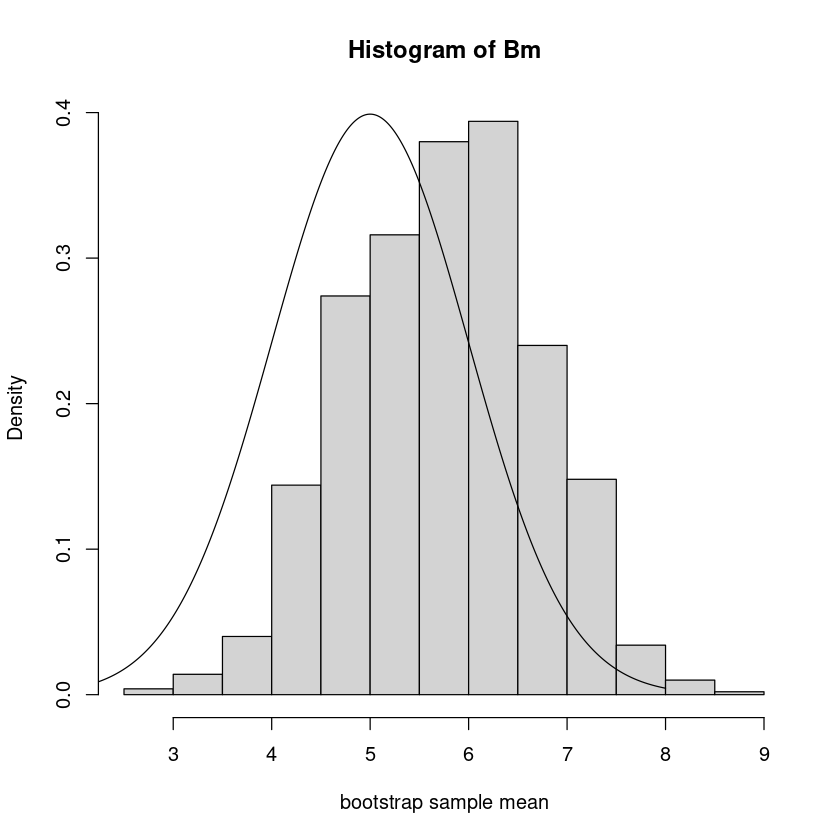

In [2]:
B=1000
BS=matrix(0,B,length(x))
Bm=c()
for (i in 1:B)
  {
  BS[i,]=sample(x,replace=TRUE)
  Bm[i]=mean(BS[i,]) # bootstrap으로 평균 구하는 과정
  } 
hist(Bm,xlab="bootstrap sample mean", probability = T)
g = seq(5-3,5+3,0.01)
lines(g,dnorm(g,mu,sigma/sqrt(n)))

In [3]:
mean(Bm)

[1] 5.743059

In [4]:
Est_var_B = var(Bm)
cat("estimated variance by Bootstrap: ", Est_var_B)

estimated variance by Bootstrap:  0.8962641

비교

In [5]:
cat("estimated variance by a theorerical way: " , Est_var, "\nestimated variance by Bootstrap: ", Est_var_B)

estimated variance by a theorerical way:  0.8823097 
estimated variance by Bootstrap:  0.8962641

두 결과가 비슷하다.

**Q** : 분산에 대한 두 추정치 중 이론적인 접근은 어떤 가정에 의존한 것인가? Bootstrap 방법은 어떠한가?
- $var(\bar{X}) = \frac{\sigma^2}{n}$은 독립이어야 한다.
- 하지만 Bootstraping에서는 독립이라는 최소한의 가정이 없다.

표본의 크기가 충분히 클 때 표본의 중앙값의 분산, $\cal{E}_{0.5}$는 모중앙값

$$var(m) \approx \frac{1}{4nf(\cal{E}_{0.5})^2}, f: density$$

일반적인 어떤 모수 $\theta(F)$에 대한 추정량 $T(X)$의 분산, $T(X^{*}_{b})$는 $b$번째 붓스트랩 표본으로부터 계산된 추정량

$$\hat{var}(T(
X))^{*} = \frac{1}{B} \sum^{B}_{b=1} \big( T(X^{*}_{b}) - \frac{1}{B} \sum^{B}_{i=1} T(X^{*}_{b}) \big)^2$$

> **Ex** : 모집단이 $N(5,10^2)$인 분포에서 크기 $100$인 임의표본을 추출하자. 표본중앙값의 분산은 어떻게 추정될 수 있는가?

In [6]:
n = 100
mu = 5
sigma = 10
set.seed(23)
x = rnorm(n,mu,sigma)
Est_var = 1/(4*n*dnorm(mu,mu,sigma)^2) # 추정치아니라서 mu도 넣고.. 현실적이지 않다.
cat("estimated variance by a theorerical way: ",Est_var)

estimated variance by a theorerical way:  1.570796

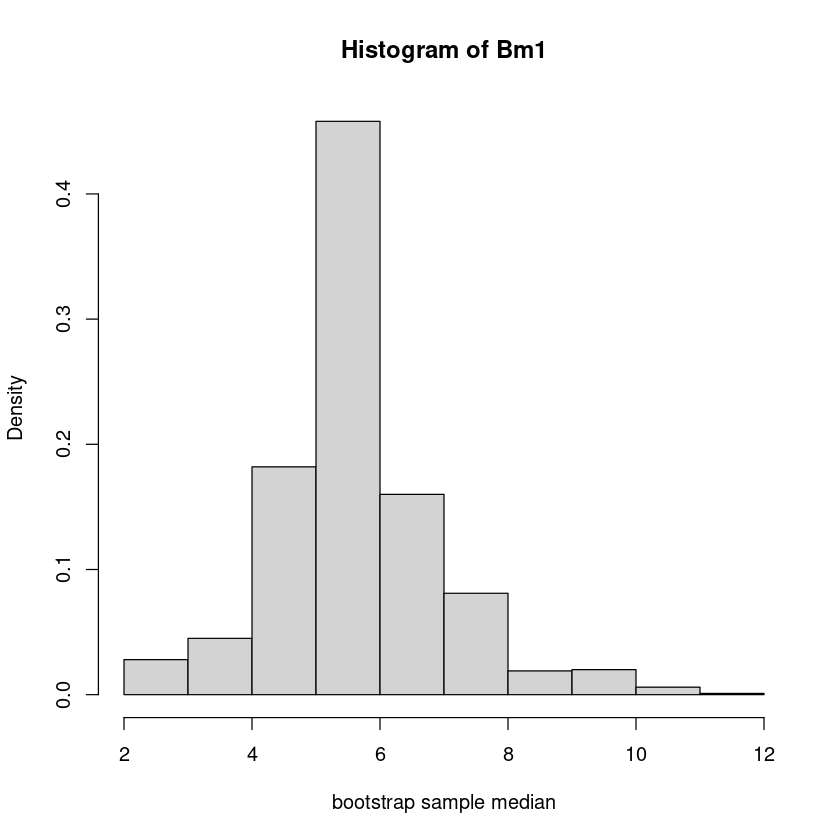

In [7]:
B=1000
BS=matrix(0,B,length(x))
Bm1=c()
for (i in 1:B)
  {
  BS[i,]=sample(x,replace=TRUE) # 복원추출가능~
  Bm1[i]=median(BS[i,]) # 표본 중앙값
  }
hist(Bm1,xlab="bootstrap sample median", probability = T)

In [8]:
mean(Bm1)

[1] 5.657096

In [9]:
cat("estimated variance by Bootstrap: ",var(Bm1))

estimated variance by Bootstrap:  1.709387

In [10]:
cat("estimated variance by a theorerical way: ",Est_var, "\nestimated variance by Bootstrap: ",var(Bm1))

estimated variance by a theorerical way:  1.570796 
estimated variance by Bootstrap:  1.709387

### 2.2 Confidence interval

> Note: 붓스트랩이 가장 powerful하게 적용될 수 있는 영역이 바로 구간추정이다. 

#### 2.2.1 Normal interval

만약 추정량의 분포가 (점근적으로) **정규분포**라고 할 수 있다면, 분산을 붓스트랩에 근거하여 추정하여

$$T(X) \pm z_{\alpha/2} \sqrt{\bar{var} (T(X)^{*})}$$

와 같은 붓스트랩 신뢰구간을 구성할 수 있다.

> **Ex** : 모평균에 대한 붓스트랩 신뢰구간 ($95$%)

In [11]:
barx = mean(x)
cat("by central limit theorem or normality assumption:",c(barx-qnorm(0.975)*sd(x)/sqrt(n),barx+qnorm(0.975)*sd(x)/sqrt(n)))

by central limit theorem or normality assumption: 3.906437 7.588478

In [12]:
cat("by Bootstrap (normal interval): ",c(barx-qnorm(0.975)*sqrt(Est_var_B),barx+qnorm(0.975)*sqrt(Est_var_B)))

by Bootstrap (normal interval):  3.891936 7.602979

이론값하고 비슷하고, 정규분포라 할 수 있는 추정량의 분포에서 나온 신뢰구간이기 떄문에 믿을만하다.

#### 2.2.2 Pivotal interval

추정량의 분포가 정규분포라는 가정을 하기 어려울떄

$$(2\bar{\theta} - v^{*}_{1-\alpha /2}, 2 \bar{\theta} - v^{*}_{\alpha /2} )$$

> **Ex** : 모평균에 대한 붓스트랩 신뢰구간 ($95$%)

In [13]:
cat("by Bootstrap (pivotal interval): ",c(2*barx-quantile(Bm,0.975),2*barx-quantile(Bm,0.025)))

by Bootstrap (pivotal interval):  4.006992 7.574828

#### 2.2.3 Percentile interval

간단하지만 pivotal에 비해 정확도가 떨어진다.

$$(v^{*}_{\alpha /2}, v^{*}_{1 - \alpha /2} )$$

> **Ex** : 모평균에 대한 붓스트랩 신뢰구간 ($95$%)

In [14]:
cat("by Bootstrap (percentile interval): ",c(quantile(Bm,0.025),quantile(Bm,0.975)))

by Bootstrap (percentile interval):  3.920087 7.487923

4개의 CI가 비슷하다. 간단해서 그런 것일수도?

In [15]:
cat("estimated variance by a theorerical way: ",Est_var, "\nestimated variance by Bootstrap: ",var(Bm1),"\nby Bootstrap (pivotal interval): ",c(2*barx-quantile(Bm,0.975),2*barx-quantile(Bm,0.025)),"\nby Bootstrap (percentile interval): ",c(quantile(Bm,0.025),quantile(Bm,0.975)))

estimated variance by a theorerical way:  1.570796 
estimated variance by Bootstrap:  1.709387 
by Bootstrap (pivotal interval):  4.006992 7.574828 
by Bootstrap (percentile interval):  3.920087 7.487923

#### 2.2.4 추정량의 분포를 정규분포로 볼 수 없는 경우

> **Ex** : 모집단이 $χ^2(5)$인 분포에서 크기 $100, 10$인 임의표본을 각각 추출하자. 모평균에 대한 $95$% 신뢰구간을 구성하여 보자.

- 크기 100 -> 정규분포 근사
- 크기 10 -> 정규분포 근사 불가능(중심극한정리 적용 안 돼)

크기가 100일 경우

In [16]:
n = 100
df = 2
set.seed(23)
x = rchisq(n,df)
Est_var = var(x)/n
cat("estimated variance by a theorerical way: ",Est_var)

estimated variance by a theorerical way:  0.04477357

In [17]:
B=1000
BS=matrix(0,B,length(x))
Bm=c()
for (i in 1:B)
  {
  BS[i,]=sample(x,replace=TRUE)
  Bm[i]=mean(BS[i,])
  }
Est_var_B = var(Bm)     
cat("estimated variance by Bootstrap: ",Est_var_B)

estimated variance by Bootstrap:  0.04454241

In [18]:
barx = mean(x)
cat("by central limit theorem or normality assumption: ", c(barx-qnorm(0.975)*sd(x)/sqrt(n),barx+qnorm(0.975)*sd(x)/sqrt(n)))

by central limit theorem or normality assumption:  1.843648 2.673095

In [19]:
cat("by Bootstrap (normal interval): ",c(barx-qnorm(0.975)*sqrt(Est_var_B),barx+qnorm(0.975)*sqrt(Est_var_B)))

by Bootstrap (normal interval):  1.84472 2.672023

In [20]:
cat("by Bootstrap (pivotal interval):")
c(2*barx-quantile(Bm,0.975),2*barx-quantile(Bm,0.025))

by Bootstrap (pivotal interval):

97.5%     2.5% 
1.809458 2.647588

In [21]:
cat("by Bootstrap (percentile interval)")
c(quantile(Bm,0.025),quantile(Bm,0.975))

by Bootstrap (percentile interval)

2.5%    97.5% 
1.869155 2.707284

크기가 10일 경우

In [22]:
n = 10
df = 2
set.seed(23)
x = rchisq(n,df)
Est_var = var(x)/n
cat("estimated variance by a theorerical way: ",Est_var)

estimated variance by a theorerical way:  0.2240771

In [23]:
B=1000
BS=matrix(0,B,length(x))
Bm=c()
for (i in 1:B)
  {
  BS[i,]=sample(x,replace=TRUE)
  Bm[i]=mean(BS[i,])
  }
Est_var_B = var(Bm)    
cat("estimated variance by Bootstrap: ",Est_var_B)

estimated variance by Bootstrap:  0.1869577

In [24]:
barx = mean(x)
cat("by normality assumption: ",c(barx-qnorm(0.975)*sd(x)/sqrt(n),barx+qnorm(0.975)*sd(x)/sqrt(n)))

by normality assumption:  0.5895974 2.445165

In [25]:
cat("by Bootstrap (normal interval): ",c(barx-qnorm(0.975)*sqrt(Est_var_B),barx+qnorm(0.975)*sqrt(Est_var_B)))

by Bootstrap (normal interval):  0.6699202 2.364842

In [26]:
cat("by Bootstrap (pivotal interval): ",c(2*barx-quantile(Bm,0.975),2*barx-quantile(Bm,0.025)))

by Bootstrap (pivotal interval):  0.6658902 2.311604

In [27]:
cat("by Bootstrap (percentile interval): ",c(quantile(Bm,0.025),quantile(Bm,0.975)))

by Bootstrap (percentile interval):  0.7231587 2.368872

$\therefore$ 정규가정 분포 아닌데 정규분포 이용해 CI 구하면 신뢰도가 떨어진다.

## 3. Bootstrap in regression

### 3.1 Bootstrap sampling

#### 3.1.1 Bootstrapping the residuals

#### 3.1.2 Bootstrapping the pairs

회귀모형은 다음과 같이 설명변수와 반응변수의 순서쌍을 관측했다고 보통 가정하게 된다.

$$(x_1, y_1), \dots , (x_n, y_n)$$

- 이 방법은 모형의 형태에 의존하지 않는다.
- 오차항에 대한 가정으로부터도 상대적으로 자유롭다.
- 위와 같은 이유로 비교적 강건한(robust)한 결과를 기대할 수 있다.
- random design 하에서는 본 방식을 적용하는 것이 자연스러우나 설명변수의 값이 주어졌다고 생각하면 residual을 이용한 방식의 적용도 가능하다.

### 3.2 Bootstarp in simple linear regression models

> **Ex** : 모든 가정이 잘 충족되는 경우

- $y_i = 2 + x_i + \epsilon_i$
- $X_i \sim^{iid} U(0,1)$
- $\epsilon_i \sim^{iid} N(0,1)$
- 붓스트랩 샘플수 2000, 95% 신뢰구간 구성 1000번 반복
- 1000개의 신뢰구간 중 실제 모수를 포함하는 비율 계산

학습할떄나 이렇게 많이 돌리지.. 실제로는 안 해..

In [50]:
B=2000;M=1000
set.seed(1)
n=10

x=matrix(runif(n*M),M,n)
c22=1/rowSums((x-rowMeans(x))^2)
#ep=matrix(rgamma(n*M,shape=2,scale=sqrt(1/2))-sqrt(2),M,n)
# ep=matrix(rcauchy(n*M),M,n)
ep=matrix(rnorm(n*M),M,n)
y=2+x+ep
sxx=rowSums(x^2)-n*rowMeans(x)^2
sxy=rowSums(x*y)-n*rowMeans(x)*rowMeans(y)
hb=cbind(rowMeans(y)-(sxy/sxx)*rowMeans(x),sxy/sxx)
e=y-hb[,1]-x*hb[,2]
hsigma=sqrt(rowSums(e^2)/(n-2))
c22=1/rowSums((x-rowMeans(x))^2)
Bm0=Bm1=matrix(0,M,B)


for (i in 1:B)
  {
  hi=sample(1:n,replace=T)
  hx=x[,hi]
  hy=y[,hi]
  sxxb=rowSums(hx*hx)-n*rowMeans(hx)*rowMeans(hx)
  sxyb=rowSums(hx*hy)-n*rowMeans(hx)*rowMeans(hy)
  hbb=cbind(rowMeans(hy)-(sxyb/sxxb)*rowMeans(hx),sxyb/sxxb)
  Bm0[,i]=hbb[,1] 
  Bm1[,i]=hbb[,2] 
}
# Bootstrap C.I. (normal interval)
BN=cbind(hb[,2]-qnorm(0.975)*apply(Bm1,1,sd),hb[,2]+qnorm(0.975)*apply(Bm1,1,sd))
# Bootstrap C.I. (Pivotal interval)
BP=cbind(2*hb[,2]-apply(Bm1,1,quantile,probs=0.975),2*hb[,2]-qnorm(0.975)*apply(Bm1,1,quantile,probs=0.025))
# Bootstrap C.I. (Percentile interval)
BPer=cbind(apply(Bm1,1,quantile,probs=0.025),apply(Bm1,1,quantile,probs=0.975))
# theoretical C.I. (normal interval)
AN=cbind(hb[,2]-qnorm(0.975)*sqrt(hsigma^2/sxx),hb[,2]+qnorm(0.975)*sqrt(hsigma^2/sxx))  # average lengths of intervals
cat("Bootstrap C.I. (normal interval): ",c(diff(colMeans(BN))),"\nBootstrap C.I. (Pivotal interval): ",c(diff(colMeans(BP))),"\nBootstrap C.I. (Percentile interval): ",c(diff(colMeans(BPer))),"\ntheoretical C.I. (normal interval): ", c(diff(colMeans(AN))))

Bootstrap C.I. (normal interval):  5.114787 
Bootstrap C.I. (Pivotal interval):  6.473361 
Bootstrap C.I. (Percentile interval):  5.008469 
theoretical C.I. (normal interval):  4.583317

pivotal의 C.I가 가장 95%에 근접하다 $\rightarrow$ 하지만 높다고 무조건 좋은 게 아냐. 

In [54]:
# coverage proportions
cat("Bootstrap C.I. (normal interval): ",c(mean(apply(BN-1,1,prod)<0)),"\nBootstrap C.I. (Pivotal interval): ",c(mean(apply(BP-1,1,prod)<0)),"\nBootstrap C.I. (Percentile interval): ",c(mean(apply(BPer-1,1,prod)<0)),"\ntheoretical C.I. (normal interval): ",c(mean(apply(AN-1,1,prod)<0)))

Bootstrap C.I. (normal interval):  0.934 
Bootstrap C.I. (Pivotal interval):  0.964 
Bootstrap C.I. (Percentile interval):  0.921 
theoretical C.I. (normal interval):  0.924

> **Ex** : 정규성 가정의 위배 (소표본)

- $y_i = 2 + x_i + \epsilon_i$
- $X_i \sim^{iid} U(0,1)$
- $\epsilon_i \sim^{iid} \Gamma(2,\sqrt{1/2})$
- 붓스트랩 샘플수 2000, 95% 신뢰구간 구성 1000번 반복
- 1000개의 신뢰구간 중 실제 모수를 포함하는 비율 계산

정규성 가정한 거랑 이론값이랑 차이 있을걸?

In [61]:
B=2000;M=1000
set.seed(1)
n=10

x=matrix(runif(n*M),M,n)
c22=1/rowSums((x-rowMeans(x))^2)
ep=matrix(rgamma(n*M,shape=2,scale=sqrt(1/2))-sqrt(2),M,n)
#ep=matrix(rnorm(n*M),M,n)
y=2+x+ep
sxx=rowSums(x^2)-n*rowMeans(x)^2
sxy=rowSums(x*y)-n*rowMeans(x)*rowMeans(y)
hb=cbind(rowMeans(y)-(sxy/sxx)*rowMeans(x),sxy/sxx)
e=y-hb[,1]-x*hb[,2]
hsigma=sqrt(rowSums(e^2)/(n-2))
c22=1/rowSums((x-rowMeans(x))^2)
Bm0=Bm1=matrix(0,M,B)


for (i in 1:B)
  {
  hi=sample(1:n,replace=T)
  hx=x[,hi]
  hy=y[,hi]
  sxxb=rowSums(hx*hx)-n*rowMeans(hx)*rowMeans(hx)
  sxyb=rowSums(hx*hy)-n*rowMeans(hx)*rowMeans(hy)
  hbb=cbind(rowMeans(hy)-(sxyb/sxxb)*rowMeans(hx),sxyb/sxxb)
  Bm0[,i]=hbb[,1] 
  Bm1[,i]=hbb[,2] 
}
# Bootstrap C.I. (normal interval)
BN=cbind(hb[,2]-qnorm(0.975)*apply(Bm1,1,sd),hb[,2]+qnorm(0.975)*apply(Bm1,1,sd))
# Bootstrap C.I. (Pivotal interval)
BP=cbind(2*hb[,2]-apply(Bm1,1,quantile,probs=0.975),2*hb[,2]-qnorm(0.975)*apply(Bm1,1,quantile,probs=0.025))
# Bootstrap C.I. (Percentile interval)
BPer=cbind(apply(Bm1,1,quantile,probs=0.025),apply(Bm1,1,quantile,probs=0.975))
# theoretical C.I. (normal interval)
AN=cbind(hb[,2]-qnorm(0.975)*sqrt(hsigma^2/sxx),hb[,2]+qnorm(0.975)*sqrt(hsigma^2/sxx))  # average lengths of intervals
cat("Bootstrap C.I. (normal interval): ",c(diff(colMeans(BN))),"\nBootstrap C.I. (Pivotal interval): ",c(diff(colMeans(BP))),"\nBootstrap C.I. (Percentile interval): ",c(diff(colMeans(BPer))),"\ntheoretical C.I. (normal interval): ", c(diff(colMeans(AN))))

Bootstrap C.I. (normal interval):  5.116709 
Bootstrap C.I. (Pivotal interval):  6.362796 
Bootstrap C.I. (Percentile interval):  4.928345 
theoretical C.I. (normal interval):  4.515607

pivotal이 가장 95%에 근접하네~

Normal 가정보다 이론이 더 안좋네? $\rightarrow$ 위험할 수 있어, 마음대로 정규성 가정은 금지

In [62]:
# coverage proportions
cat("Bootstrap C.I. (normal interval): ",c(mean(apply(BN-1,1,prod)<0)),"\nBootstrap C.I. (Pivotal interval): ",c(mean(apply(BP-1,1,prod)<0)),"\nBootstrap C.I. (Percentile interval): ",c(mean(apply(BPer-1,1,prod)<0)),"\ntheoretical C.I. (normal interval): ",c(mean(apply(AN-1,1,prod)<0)))

Bootstrap C.I. (normal interval):  0.932 
Bootstrap C.I. (Pivotal interval):  0.947 
Bootstrap C.I. (Percentile interval):  0.904 
theoretical C.I. (normal interval):  0.907

> **Ex** : 정규성 가정의 위배 (대표본)

- $y_i = 2 + x_i + \epsilon_i$
- $X_i \sim^{iid} U(0,1)$
- $\epsilon_i \sim^{iid} \Gamma(2,\sqrt{1/2})$
- 붓스트랩 샘플수 2000, 95% 신뢰구간 구성 1000번 반복
- 1000개의 신뢰구간 중 실제 모수를 포함하는 비율 계산

$\epsilon$ 이 정규성 가정을 따르지 않더라도 $\hat{\beta}$의 n이 충분히 크면 정규성 가정 가능하지 $\rightarrow$ 중심극한정리

In [59]:
B=2000;M=1000
set.seed(1)
n=50

x=matrix(runif(n*M),M,n)
c22=1/rowSums((x-rowMeans(x))^2)
ep=matrix(rgamma(n*M,shape=2,scale=sqrt(1/2))-sqrt(2),M,n)
#ep=matrix(rnorm(n*M),M,n)
y=2+x+ep
sxx=rowSums(x^2)-n*rowMeans(x)^2
sxy=rowSums(x*y)-n*rowMeans(x)*rowMeans(y)
hb=cbind(rowMeans(y)-(sxy/sxx)*rowMeans(x),sxy/sxx)
e=y-hb[,1]-x*hb[,2]
hsigma=sqrt(rowSums(e^2)/(n-2))
c22=1/rowSums((x-rowMeans(x))^2)
Bm0=Bm1=matrix(0,M,B)


for (i in 1:B)
  {
  hi=sample(1:n,replace=T)
  hx=x[,hi]
  hy=y[,hi]
  sxxb=rowSums(hx*hx)-n*rowMeans(hx)*rowMeans(hx)
  sxyb=rowSums(hx*hy)-n*rowMeans(hx)*rowMeans(hy)
  hbb=cbind(rowMeans(hy)-(sxyb/sxxb)*rowMeans(hx),sxyb/sxxb)
  Bm0[,i]=hbb[,1] 
  Bm1[,i]=hbb[,2] 
}
# Bootstrap C.I. (normal interval)
BN=cbind(hb[,2]-qnorm(0.975)*apply(Bm1,1,sd),hb[,2]+qnorm(0.975)*apply(Bm1,1,sd))
# Bootstrap C.I. (Pivotal interval)
BP=cbind(2*hb[,2]-apply(Bm1,1,quantile,probs=0.975),2*hb[,2]-qnorm(0.975)*apply(Bm1,1,quantile,probs=0.025))
# Bootstrap C.I. (Percentile interval)
BPer=cbind(apply(Bm1,1,quantile,probs=0.025),apply(Bm1,1,quantile,probs=0.975))
# theoretical C.I. (normal interval)
AN=cbind(hb[,2]-qnorm(0.975)*sqrt(hsigma^2/sxx),hb[,2]+qnorm(0.975)*sqrt(hsigma^2/sxx))  # average lengths of intervals
cat("Bootstrap C.I. (normal interval): ",c(diff(colMeans(BN))),"\nBootstrap C.I. (Pivotal interval): ",c(diff(colMeans(BP))),"\nBootstrap C.I. (Percentile interval): ",c(diff(colMeans(BPer))),"\ntheoretical C.I. (normal interval): ", c(diff(colMeans(AN))))

Bootstrap C.I. (normal interval):  1.908465 
Bootstrap C.I. (Pivotal interval):  1.878544 
Bootstrap C.I. (Percentile interval):  1.906769 
theoretical C.I. (normal interval):  1.932041

표본이 어느정도 확보되면(30이상) 정규성 가정 위배하더라도 정규성 가정 가능

Noramal 이랑 이론 좋네

In [60]:
# coverage proportions
cat("Bootstrap C.I. (normal interval): ",c(mean(apply(BN-1,1,prod)<0)),"\nBootstrap C.I. (Pivotal interval): ",c(mean(apply(BP-1,1,prod)<0)),"\nBootstrap C.I. (Percentile interval): ",c(mean(apply(BPer-1,1,prod)<0)),"\ntheoretical C.I. (normal interval): ",c(mean(apply(AN-1,1,prod)<0)))

Bootstrap C.I. (normal interval):  0.952 
Bootstrap C.I. (Pivotal interval):  0.982 
Bootstrap C.I. (Percentile interval):  0.949 
theoretical C.I. (normal interval):  0.953

> **Ex** : 등분산 가정의 위배

- $y_i = 2 + x_i + \epsilon_i$
- $X_i \sim^{iid} U(0,1)$
- $\epsilon_i \sim^{iid} N(0,(x_i - 10)^2)$
- 붓스트랩 샘플수 2000, 95% 신뢰구간 구성 1000번 반복
- 1000개의 신뢰구간 중 실제 모수를 포함하는 비율 계산

분산 바꿔서 시도해보기(등분산 위배)

- Normal 은 괜찮을 수도
- 이론은 등분산 깨지면 영향을 많이 받을 걸

In [63]:
B=2000;M=1000
set.seed(1)
n=10

x=matrix(runif(n*M),M,n)
c22=1/rowSums((x-rowMeans(x))^2)
ep=matrix(rgamma(n*M,shape=2,scale=sqrt(1/2))-sqrt(2),M,n)
#ep=matrix(rnorm(n*M),M,n)
y=2+x+ep*abs(x-10)
sxx=rowSums(x^2)-n*rowMeans(x)^2
sxy=rowSums(x*y)-n*rowMeans(x)*rowMeans(y)
hb=cbind(rowMeans(y)-(sxy/sxx)*rowMeans(x),sxy/sxx)
e=y-hb[,1]-x*hb[,2]
hsigma=sqrt(rowSums(e^2)/(n-2))
c22=1/rowSums((x-rowMeans(x))^2)
Bm0=Bm1=matrix(0,M,B)


for (i in 1:B)
  {
  hi=sample(1:n,replace=T)
  hx=x[,hi]
  hy=y[,hi]
  sxxb=rowSums(hx*hx)-n*rowMeans(hx)*rowMeans(hx)
  sxyb=rowSums(hx*hy)-n*rowMeans(hx)*rowMeans(hy)
  hbb=cbind(rowMeans(hy)-(sxyb/sxxb)*rowMeans(hx),sxyb/sxxb)
  Bm0[,i]=hbb[,1] 
  Bm1[,i]=hbb[,2] 
}
# Bootstrap C.I. (normal interval)
BN=cbind(hb[,2]-qnorm(0.975)*apply(Bm1,1,sd),hb[,2]+qnorm(0.975)*apply(Bm1,1,sd))
# Bootstrap C.I. (Pivotal interval)
BP=cbind(2*hb[,2]-apply(Bm1,1,quantile,probs=0.975),2*hb[,2]-qnorm(0.975)*apply(Bm1,1,quantile,probs=0.025))
# Bootstrap C.I. (Percentile interval)
BPer=cbind(apply(Bm1,1,quantile,probs=0.025),apply(Bm1,1,quantile,probs=0.975))
# theoretical C.I. (normal interval)
AN=cbind(hb[,2]-qnorm(0.975)*sqrt(hsigma^2/sxx),hb[,2]+qnorm(0.975)*sqrt(hsigma^2/sxx))  # average lengths of intervals
cat("Bootstrap C.I. (normal interval): ",c(diff(colMeans(BN))),"\nBootstrap C.I. (Pivotal interval): ",c(diff(colMeans(BP))),"\nBootstrap C.I. (Percentile interval): ",c(diff(colMeans(BPer))),"\ntheoretical C.I. (normal interval): ", c(diff(colMeans(AN))))

Bootstrap C.I. (normal interval):  48.62961 
Bootstrap C.I. (Pivotal interval):  68.74807 
Bootstrap C.I. (Percentile interval):  46.84358 
theoretical C.I. (normal interval):  42.92363

pivotal 좋아

percent 별로

이론 별로

In [66]:
# coverage proportions
cat("Bootstrap C.I. (normal interval): ",c(mean(apply(BN-1,1,prod)<0)),"\nBootstrap C.I. (Pivotal interval): ",c(mean(apply(BP-1,1,prod)<0)),"\nBootstrap C.I. (Percentile interval): ",c(mean(apply(BPer-1,1,prod)<0),"\ntheoretical C.I. (normal interval): ",c(mean(apply(AN-1,1,prod)<0))))

Bootstrap C.I. (normal interval):  0.934 
Bootstrap C.I. (Pivotal interval):  0.946 
Bootstrap C.I. (Percentile interval):  0.902 
theoretical C.I. (normal interval):  0.908

> **Ex** : 독립성 가정의 위배

- $y_i = 2 + x_i + \epsilon_i$
- $X_i \sim^{iid} U(0,1)$
- $\epsilon_i \sim^{iid} AR(0.8)$
- 붓스트랩 샘플수 2000, 95% 신뢰구간 구성 1000번 반복
- 1000개의 신뢰구간 중 실제 모수를 포함하는 비율 계산

$\epsilon_i \sim^{iid} AR(0.8)$
- $X_{i+1} = 0.8X_i + \delta_i$
    - $\delta_i \sim^\text{ iid  } N(0.1) $
- 시간 개념이 추가될 때 독립성 위배

In [67]:
B=2000;M=1000
set.seed(1)
n=10

x=matrix(runif(n*M),M,n)
c22=1/rowSums((x-rowMeans(x))^2)
ep = matrix(arima.sim(model = list(ar = 0.8), n = M*n),M,n)
y=2+x+ep
sxx=rowSums(x^2)-n*rowMeans(x)^2
sxy=rowSums(x*y)-n*rowMeans(x)*rowMeans(y)
hb=cbind(rowMeans(y)-(sxy/sxx)*rowMeans(x),sxy/sxx)
e=y-hb[,1]-x*hb[,2]
hsigma=sqrt(rowSums(e^2)/(n-2))
c22=1/rowSums((x-rowMeans(x))^2)
Bm0=Bm1=matrix(0,M,B)


for (i in 1:B)
  {
  hi=sample(1:n,replace=T)
  hx=x[,hi]
  hy=y[,hi]
  sxxb=rowSums(hx*hx)-n*rowMeans(hx)*rowMeans(hx)
  sxyb=rowSums(hx*hy)-n*rowMeans(hx)*rowMeans(hy)
  hbb=cbind(rowMeans(hy)-(sxyb/sxxb)*rowMeans(hx),sxyb/sxxb)
  Bm0[,i]=hbb[,1] 
  Bm1[,i]=hbb[,2] 
}
# Bootstrap C.I. (normal interval)
BN=cbind(hb[,2]-qnorm(0.975)*apply(Bm1,1,sd),hb[,2]+qnorm(0.975)*apply(Bm1,1,sd))
# Bootstrap C.I. (Pivotal interval)
BP=cbind(2*hb[,2]-apply(Bm1,1,quantile,probs=0.975),2*hb[,2]-qnorm(0.975)*apply(Bm1,1,quantile,probs=0.025))
# Bootstrap C.I. (Percentile interval)
BPer=cbind(apply(Bm1,1,quantile,probs=0.025),apply(Bm1,1,quantile,probs=0.975))
# theoretical C.I. (normal interval)
AN=cbind(hb[,2]-qnorm(0.975)*sqrt(hsigma^2/sxx),hb[,2]+qnorm(0.975)*sqrt(hsigma^2/sxx))  # average lengths of intervals
cat("Bootstrap C.I. (normal interval): ",c(diff(colMeans(BN))),"\nBootstrap C.I. (Pivotal interval): ",c(diff(colMeans(BP))),"\nBootstrap C.I. (Percentile interval): ",c(diff(colMeans(BPer))),"\ntheoretical C.I. (normal interval): ", c(diff(colMeans(AN))))

Bootstrap C.I. (normal interval):  8.501556 
Bootstrap C.I. (Pivotal interval):  11.1337 
Bootstrap C.I. (Percentile interval):  8.132749 
theoretical C.I. (normal interval):  7.451194

pivotal 이 가장 좋네

In [68]:
# coverage proportions
cat("Bootstrap C.I. (normal interval): ",c(mean(apply(BN-1,1,prod)<0)),"\nBootstrap C.I. (Pivotal interval): ",c(mean(apply(BP-1,1,prod)<0)),"\nBootstrap C.I. (Percentile interval): ",c(mean(apply(BPer-1,1,prod)<0)),"\ntheoretical C.I. (normal interval): ",c(mean(apply(AN-1,1,prod)<0)))

Bootstrap C.I. (normal interval):  0.934 
Bootstrap C.I. (Pivotal interval):  0.96 
Bootstrap C.I. (Percentile interval):  0.927 
theoretical C.I. (normal interval):  0.927

**Bootstrap**
- $\beta_1$에 대한 C.I.
- $H_0$: $\beta_1 = 0$ vs $H_1$ : $\beta_1 \neq 0$
    - 여기서 가정이 깨지지 않는다는 조건 하에 계산 가능
    - p-value, 유의확률 (bootstrap 뽑기도 가능)
    - *C.I.가 0을 포함하냐?!*

$X_1, \dots , X_n$이 있을 때 $H_0$ : $\mu = \mu_0$ vs $H_1$ : $\mu \neq \mu_0$
- $\big| \frac{\bar{X} - \mu_0}{s/\sqrt{n}} > Z_{\alpha/2} \big|$
    - *p-value<$\alpha$*
        - 유의수준 $\alpha$에서 유의미하다
        - $\therefore \mu \neq \mu_0$
- $\mu$에 대한 C.I. $\bar{X} \pm Z_{\alpha/2} \frac{s}{\sqrt{n}} \ni \mu_0\text{? or not? }$
    - $\mu_0$ 가 속하는지 C.I.로 알 수 있거나 p-value 유의미성에 따라 알 수 있기도 하다

검정을 하고 싶을때
1. p-value로 검정
2. C.I. 구성 후 통계적 추론

p-value 구하는 게 어렵고, C.I 구하기 쉽다면 C.I.로 검정 결과 내세우는 것도 나쁘지 않다.(간단하니..)
- *그렇다고 완전히 결과가 일치하진 않는다.*

ex) 95% C.I.가 $(0.1,0.8)$ 일때 0을 포함하지 않으니까 $\beta_1$은 0이 아니다.

## 4. Exercise

$Sales = \hat{\beta}_0 + \hat{\beta}_1 facebook + \epsilon$

1. $Sales(\hat{y})$가 커질수록 residual이 커진다. $\rightarrow$ 등분산성 위배
2. 직선과 일치하지 않는다. $\rightarrow$ 정규성 위배(선형성 위배 될 수도 있지)

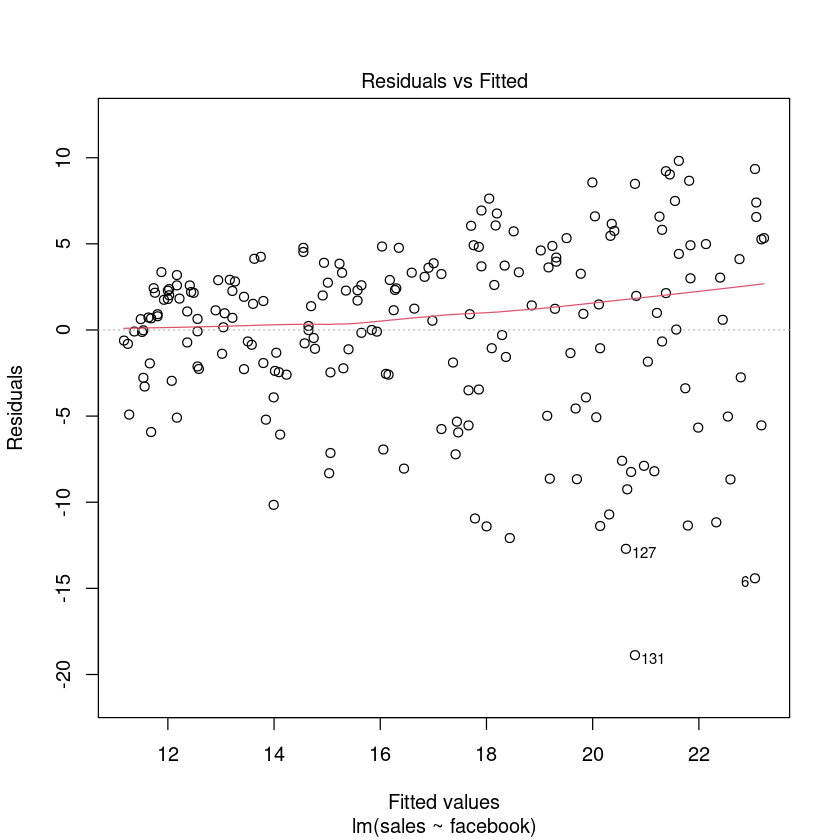

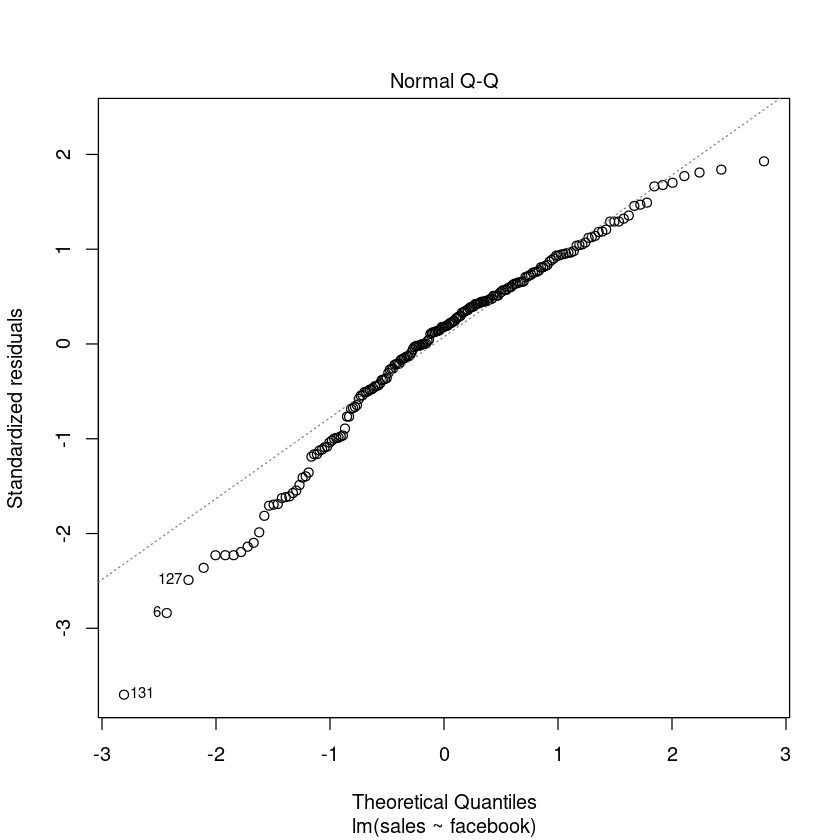

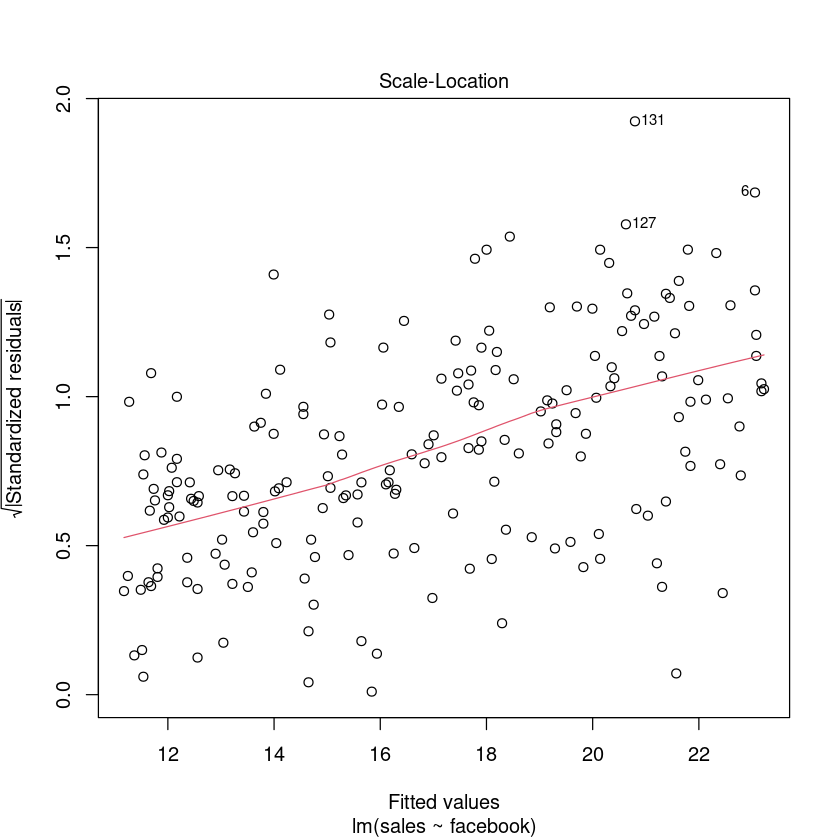

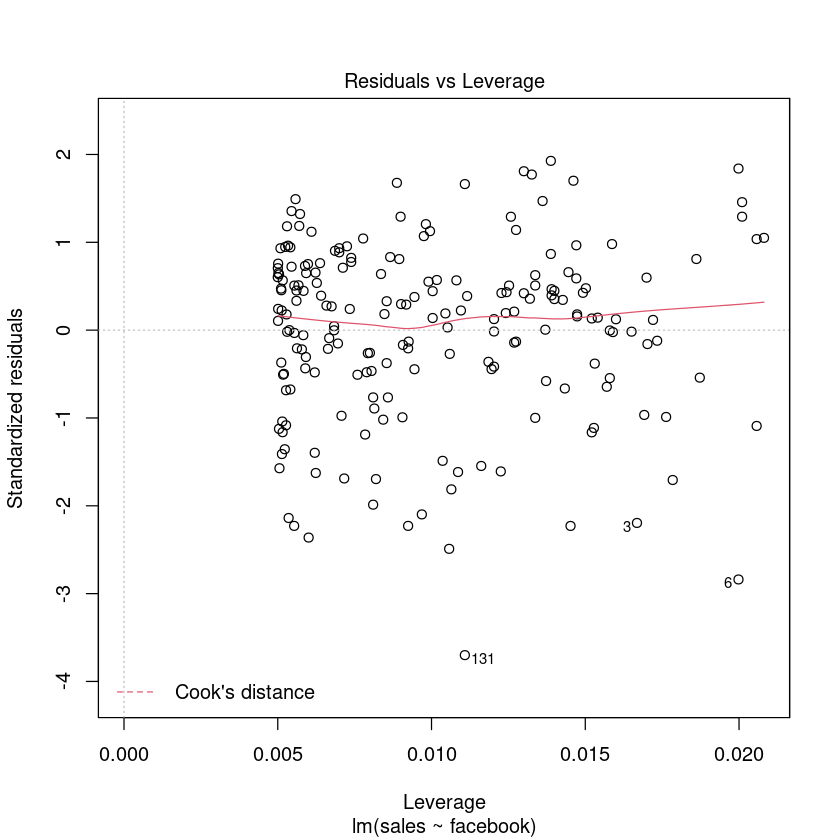

In [70]:
data("marketing", package = "datarium")
fit <- lm(sales ~ facebook, data = marketing)
plot(fit)

In [72]:
library(gvlma)

In [73]:
summary(gvlma(x=fit))


Call:
lm(formula = sales ~ facebook, data = marketing)

Residuals:
     Min       1Q   Median       3Q      Max 
-18.8766  -2.5589   0.9248   3.3330   9.8173 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 11.17397    0.67548  16.542   <2e-16 ***
facebook     0.20250    0.02041   9.921   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.13 on 198 degrees of freedom
Multiple R-squared:  0.332,	Adjusted R-squared:  0.3287 
F-statistic: 98.42 on 1 and 198 DF,  p-value: < 2.2e-16


ASSESSMENT OF THE LINEAR MODEL ASSUMPTIONS
USING THE GLOBAL TEST ON 4 DEGREES-OF-FREEDOM:
Level of Significance =  0.05 

Call:
 gvlma(x = fit) 

                      Value   p-value                   Decision
Global Stat        22.06943 1.941e-04 Assumptions NOT satisfied!
Skewness           19.44101 1.038e-05 Assumptions NOT satisfied!
Kurtosis            2.46868 1.161e-01    Assumptions acceptable.
Link Function       0

p-value는 $\beta_0, \beta_1$ 모두  <2e-16으로 $H_0$을 채택하여 $\beta_0=0$이라는 결론이 나옴

$\therefore$ facebook 광고 늘리면 Sales 증가하겠군! 영향 끼치네!

하지만 위 그림에서 정규성도 의심되고 등분산성도 의심되었잖아? $\rightarrow$ 믿기 어려워

자유도가 198인 것을 보아 n=200 $\rightarrow$ 중심극한정리로 인해 정규성을 만족한다고 할 수 있다. 등분산성 위배는 아직 문제

Skewness(3차 적률) 불만족, Kurtosis(4차 적률) 만족 $\rightarrow$ 3차 적률로 보아 정규분포 벗어난다 말할까..!?

Heteroscedasticity(등분산성) 만족? 그림만 보기로는 아닌 것 같던데!

In [41]:
shapiro.test(fit$residuals)


	Shapiro-Wilk normality test

data:  fit$residuals
W = 0.96072, p-value = 2.367e-05


$H_0$ : 정규분포이다.
- p-value = 2.367e-05로, 정규성이 깨진다는 것을 알 수 있다.
- 하지만 n이 크니까 정규성 만족한다 봐..

In [74]:
library(car)

ERROR: Error in library(car): there is no package called ‘car’


$H_0$: 등분산, $H_1$: 이분산
- p-value = 8.6237e-12로 $H_1$ 채택하여 등분산이 아니라는 결론이 도출되었다.

In [75]:
ncvTest(fit)

ERROR: Error in ncvTest(fit): could not find function "ncvTest"


```R
# Output
## Non-constant Variance Score Test 
## Variance formula: ~ fitted.values 
## Chisquare = 46.61861, Df = 1, p = 8.6237e-12
```

p-value 못 믿겠다.. 정말 facebook이 영향을 미치는 것일까?

In [78]:
B=2000
set.seed(1)
n = length(marketing$sales)
Bm1=c()

for (i in 1:B)
  {
  hi=sample(1:n,replace=T)
  hx=marketing$facebook[hi]
  hy=marketing$sales[hi]
  Bm1[i]=lm(hy~hx)$coefficients[2]
}

hb=fit$coefficients[2]

# Bootstrap C.I. (normal interval)
c(hb-qnorm(0.975)*sd(Bm1),hb+qnorm(0.975)*sd(Bm1))

facebook  facebook 
0.1601905 0.2448011

$\hat{\beta_1} \pm Z_{0.025} se(\hat{\beta_1})^*$
- 0을 포함하지 않는다.
- 즉, facebook이 유의미한 영향을 주고 있다는 결론이 나온다.

In [44]:
# Bootstrap C.I. (Pivotal interval)
c(2*hb-quantile(Bm1,probs=0.975),2*hb-quantile(Bm1,probs=0.025))

facebook  facebook 
0.1615734 0.2469393

normal이랑 pivotal은 믿을만한 방법

In [45]:
# Bootstrap C.I. (Percentile interval)
c(quantile(Bm1,probs=0.025),quantile(Bm1,probs=0.975))

2.5%     97.5% 
0.1580523 0.2434182

percent 위 두 방법이랑 다르네?

In [46]:
# CI by theory
confint(fit) 

,2.5 %,97.5 %
(Intercept),9.8419062,12.5060253
facebook,0.1622443,0.2427472


신뢰도 조정 가능!(옵션)

pivotal 이랑 이론이랑 별 차이가 없네..

---

결과는 비슷하지만 과정이 정당한지가 중요하다.$\rightarrow$ 절차적 정당성 확보
- 우리는 Bootstrap 이용해서 증명을 해낸 것이지.
- 위 그림에서 등분산/정규성 가정 위배? 애매했으니까.
- 오차항 정규성 만족하는 경우 거의 없어, 그 상태로 대부분 결론 내지.. 하지만 정당성 확보가 중요해!

회귀분석 교재보면
- 등분산 깨져?
    - 가중최소제곱 $\rightarrow$ 적용 어려워
    - 변수변환 $\rightarrow$ 전혀 다른 모형이 나올 수도 있고, 해석이 완전 달라져
- 정규성 깨져?
    - 변수변환 $\rightarrow$ 전혀 다른 모형이 나올 수도 있고, 해석이 완전 달라져
    - Box-cox $\rightarrow$ 전혀 다른 모형이 나올 수도 있고, 해석이 완전 달라져
    - 다른 분포 사용
- 독립성 깨져?
    - 일반화 최소제곱 $\rightarrow$ 적용 어려워

이상! Bootstrap이 좋은 이유였습니다~!

---

**Permutation vs Bootstrap**

Permutation test순열 검정법
- 검정할 때 쓰는, 검정을 위한 방법 
- C.I. 안 써!
- 범주형에 유용하다(그룹 간 차이)
- 복잡하면 쓰기 어렵다
- 전제: 귀무가설 하에서(null distribution) 표본 분포하는 것(?) $\rightarrow$ 찾아보기..
- 검정에 대한 기본적 원리를 알고 있다면...
- 표본$\hat{\theta}$의 분포만 안다면...


만약 두 표본 그룹이 동일한 모집단에서 추출되었다고 한다면, 두 그룹 안에 있는 샘플들을 교환한 뒤 통계적으로 검증해도 여전히 두 그룹간에는 차이가 없어야 한다.

우리는 샘플들을 섞어가면서 통계량을 여러번 추출할 것이다.

그리고 추출된 통계량들의 값의 분포를 확인해보면 원래 주어진 데이터에서 계산한 통계량이 얼마나 큰 값인지 유추해볼 수 있을 것이다.


ref: https://angeloyeo.github.io/2021/10/28/permutation_test.html

Bootstrap
- C.I. 구성, 분산 추정에 많이 사용
- 다소 modern한 방법

부트스트랩도 permutation test와 유사하게 추정량(estimator)에 대한 분포를 확인하게 해주는 비모수통계 기법이다.

차이가 있다면 크게 두 가지로 볼 수 있을 것 같다. 목적에 맞게 적절한 방법을 선택하도록 하자.

1. Bootstrap은 estimator의 Confidence interval을 확인하기 위한 목적으로 주로 사용되는 반면 Permutation test는 null hypothesis를 test하기 위해 만들어졌다. 
2. 수행 과정 상에서는 Bootstrap은 중복을 허용하는 resampling을 수행하는 반면 permutation test는 중복없는 재배열을 수행한다는 차이점이 있다. 